In [1]:
pip install wbgapi plotly eurostat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 3.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
import eurostat as es
import pandas as pd


def MonthlyElectricity():
    try: 
        # Specificy the pivotal columns, geo\\time = country, indic=kind of energy
        id_vars = ['geo\\TIME_PERIOD', 'indic']
        # The indic column uses internal EU indicators, we'll translate them to what we want with this dictionary
        indicator_dictionary = {"IS-PEL-GWH" : "Production", "IS-CEL-GWH" : "Consumption", "IS-IEL-GWH" : "Imports"}

        #data filtering
        df = es.get_data_df("EI_ISEN_M")
        df.drop(columns=['freq','s_adj'], inplace=True)
        df = df.melt(id_vars=id_vars, var_name='Date', value_name='GWH')
        df = df[df['indic'].isin(indicator_dictionary.keys())]
        df['indic'] = df['indic'].replace(indicator_dictionary)
        df.to_csv("data/ElectricityM.csv", index=False)
        
        return df
    except Error as e:
        return f"quit with {e} as error"

df = MonthlyElectricity()
EUList = ['AT', 'BE', 'BG', 'HR', 'CY', 'DK', 'EE', 'FI', 'FR', 'DE', 'IE', 'IT', 'LV', 'LU', 'NL', 'NO', 'PL', 'RO', 'ES', 'SE', 'CH', 'GB']
filtered_df = df[df['geo\TIME_PERIOD'].isin(EUList)]
#print(filtered_df)

belgiumdf2 = filtered_df[filtered_df['geo\\TIME_PERIOD'] == 'BE']
unique_values = belgiumdf2['indic'].unique()

Datelist = ['2011-01','2011-02','2011-03','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12']
belgiumdf3 = belgiumdf2[belgiumdf2['Date'].isin(Datelist)]


# Initialize a dictionary to store the summed energy values for each unique value
summed_energy2 = {}

# Loop through unique values and calculate the sum of energy for each
for value in unique_values:
    summed_energy2[value] = belgiumdf3[belgiumdf3['indic'] == value][['GWH']].sum()

# Print the summed energy for each unique value
for value, total_energy in summed_energy2.items():
    print(f"Total energy for \n'{value}': {total_energy}")

total_energy_sum2 = sum(summed_energy2.values())
print(f"Sum of all total energies: {total_energy_sum2}")

# Define the conversion factor
conversion_factor = 0.0859845  # ktoe per GWh

# Convert from GWh to ktoe
energy_ktoe = total_energy_sum2 * conversion_factor

# Print the result
print(f"{total_energy_sum2} GWh is approximately equal to {energy_ktoe} ktoe")


Total energy for 
'Consumption': GWH    85586.0
dtype: float64
Total energy for 
'Imports': GWH    13549.0
dtype: float64
Total energy for 
'Production': GWH    0.0
dtype: float64
Sum of all total energies: GWH    99135.0
dtype: float64
GWH    99135.0
dtype: float64 GWh is approximately equal to GWH    8524.073408
dtype: float64 ktoe


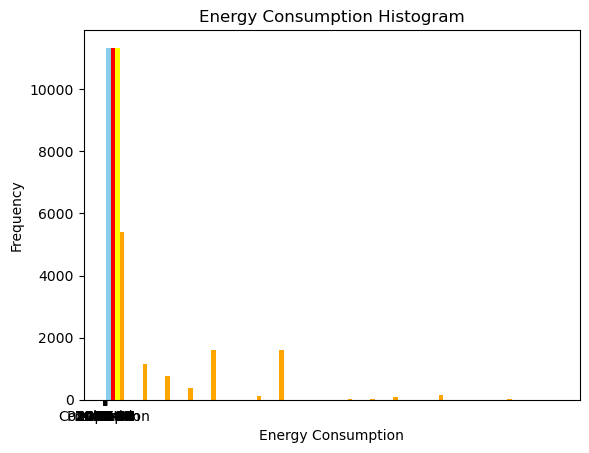

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(filtered_df, bins=20, color=['skyblue','red','yellow','orange'])

# Add labels and a title
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Energy Consumption Histogram')

# Show the histogram
plt.show()

In [65]:
import eurostat as es
import pandas as pd

def TypesOfEnergy():
    try: 
        # Specificy the pivotal columns, geo\\time = country, indic=kind of energy
        id_vars = ['geo\\TIME_PERIOD', 'indic']
        # The indic column uses internal EU indicators, we'll translate them to what we want with this dictionary
        indicator_dictionary = {"C0000X0350-0370" : "Solid Fossil Fuels", "IS-CEL-GWH" : "Consumption", "IS-IEL-GWH" : "Imports"}
        df = es.get_data_df("ten00122")
        df.drop(columns=['freq','nrg_bal','unit'], inplace=True)
       # df = df.melt(id_vars=id_vars, var_name='Date', value_name='GWH')
       # df = df[df['indic'].isin(indicator_dictionary.keys())]
       # df['indic'] = df['indic'].replace(indicator_dictionary)
        #df.to_csv("ElectricityM.csv", index=False)
        return df
    except Exception as e:
        return f"quit with {e} as error"

df2 = TypesOfEnergy()
#print(df2)
df2.fillna(0, inplace=True)
    

belgiumdf = df2[df2['geo\\TIME_PERIOD'] == 'BE']
unique_values = belgiumdf['siec'].unique()

# Initialize a dictionary to store the summed energy values for each unique value
summed_energy_data = {}

# Loop through unique values and calculate the sum of energy for each
for value in unique_values:
    summed_energy[value] = belgiumdf[belgiumdf['siec'] == value][['2011']].sum()
    
# Print the summed energy for each unique value
for value, total_energy in summed_energy.items():
    print(f"Total energy for \n'{value}': {total_energy}")

total_energy_sum = sum(summed_energy.values())
print(f"Sum of all total energies: {total_energy_sum}")

# Define the reverse conversion factor
reverse_conversion_factor = 11.631  # GWh per ktoe

# Convert from ktoe to GWh
energy_gwh = total_energy_sum / reverse_conversion_factor

# Print the result
print(f"{total_energy_sum} ktoe is approximately equal to {energy_gwh} GWh")







Total energy for 
'C0000X0350-0370': 2011    3505.124
dtype: float64
Total energy for 
'C0350-0370': 2011    0.0
dtype: float64
Total energy for 
'E7000': 2011    218.143
dtype: float64
Total energy for 
'G3000': 2011    14450.002
dtype: float64
Total energy for 
'H8000': 2011    217.485
dtype: float64
Total energy for 
'N900H': 2011    11700.611
dtype: float64
Total energy for 
'O4000XBIO': 2011    21378.12
dtype: float64
Total energy for 
'P1000': 2011    0.0
dtype: float64
Total energy for 
'RA000': 2011    2993.455
dtype: float64
Total energy for 
'S2000': 2011    0.0
dtype: float64
Total energy for 
'TOTAL': 2011    55189.932
dtype: float64
Total energy for 
'W6100_6220': 2011    726.992
dtype: float64
Sum of all total energies: 2011    110379.864
dtype: float64
2011    110379.864
dtype: float64 ktoe is approximately equal to 2011    9490.143926
dtype: float64 GWh


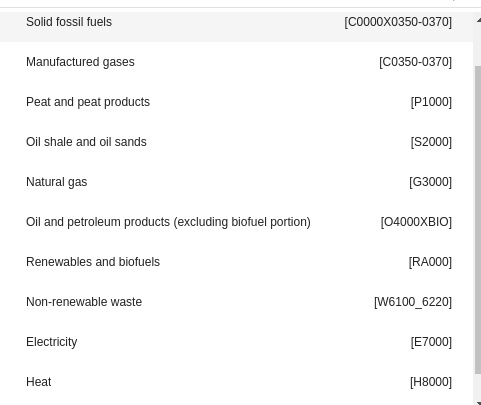


In [4]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine, text, inspect, Table
#hello

#tsv = pd.read_csv("testcsv.csv", sep=",")
#engine = create_engine("postgresql://student:infomdss@db_dashboard:5432/dashboard")
#tsv.to_sql("EURO1", engine, if_exists="replace", index=True)

